In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
DATA_URL = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv'

In [3]:
df = pd.read_csv(DATA_URL)

In [4]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [5]:
df.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

In [6]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


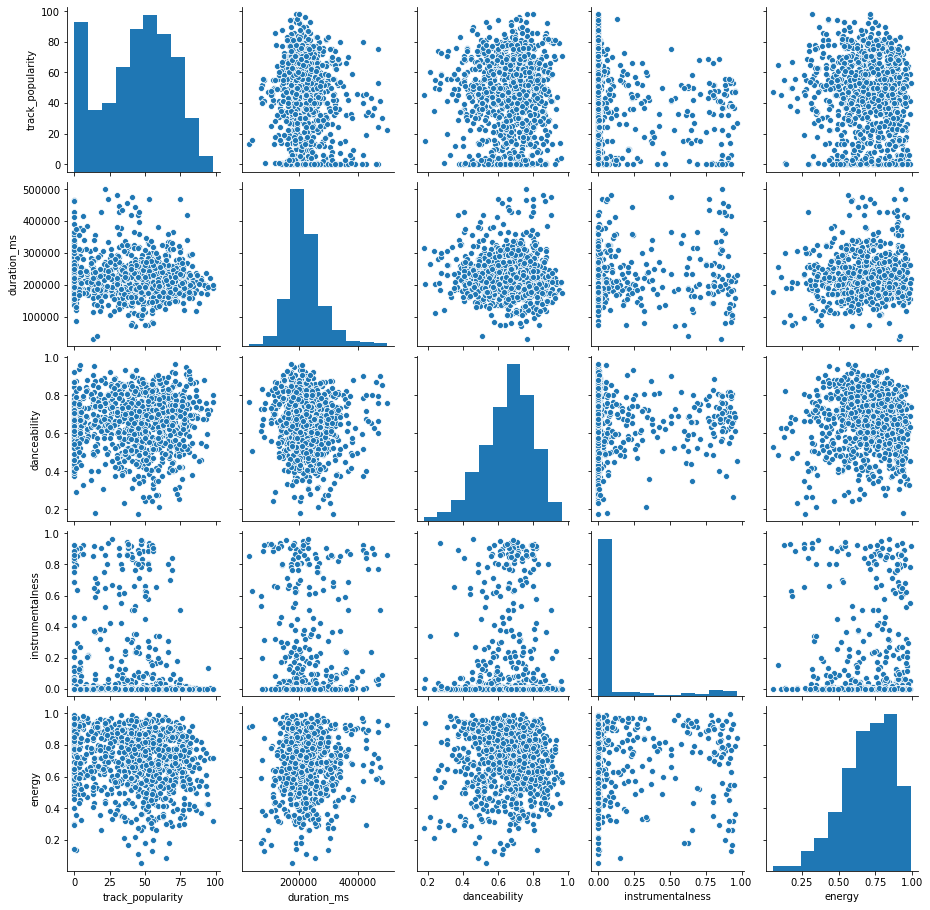

In [7]:
sns.pairplot(df[['track_popularity', 'duration_ms', 'danceability', 'instrumentalness', 'energy']].sample(1000))

In [8]:
import statsmodels.formula.api as smf

In [9]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [17]:
predictors = [c for c in df.columns if c != 'track_popularity']
model = smf.ols(formula=f'track_popularity ~ C(playlist_genre)', data=df.sample(1000)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     8.753
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           3.88e-08
Time:                        11:33:45   Log-Likelihood:                -4612.4
No. Observations:                1000   AIC:                             9237.
Df Residuals:                     994   BIC:                             9266.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [19]:
df['playlist_genre'].unique()

array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

In [23]:
df.groupby('playlist_genre')['track_popularity'].mean()

playlist_genre
edm      34.833526
latin    47.026576
pop      47.744870
r&b      41.223532
rap      43.215454
rock     41.728338
Name: track_popularity, dtype: float64

In [34]:
sns.barplot(df.groupby('playlist_genre', 'track_popularity').mean(), hue = df['playlist_genre'])

ValueError: No axis named track_popularity for object type DataFrame

In [35]:
df = pd.read_csv('https://data.ct.gov/api/views/5mzw-sjtu/rows.csv?accessType=DOWNLOAD')

<ipython-input-35-26e11a5baa0f>:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://data.ct.gov/api/views/5mzw-sjtu/rows.csv?accessType=DOWNLOAD')


In [41]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,NaN,NaN,NaN,NaN


In [111]:
df = df.drop(['Serial Number', 'Non Use Code', 'Assessor Remarks', 'OPM remarks', 'Location', 'Address'], axis=1, errors='ignore')

In [134]:
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'])

In [189]:
df.tail()

,List Year,Date Recorded,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Month
1054154,2021,2021-11-16,Watertown,263100.0,430000.0,0.6118,Residential,Single Family,11.0
1054155,2021,2022-09-20,Woodbury,79810.0,200000.0,0.3990,Residential,Condo,9.0
1054156,2021,2022-05-06,Woodbury,79590.0,360000.0,0.2210,Vacant Land,NaN,5.0
1054157,2021,2022-06-29,West Haven,117600.0,275000.0,0.4276,Residential,Single Family,6.0
1054158,2021,2022-04-26,Windsor,130690.0,190000.0,0.6878,Commercial,NaN,4.0


In [137]:
df['Month'] = df['Date Recorded'].dt.month

In [132]:
df.dtypes

List Year             int64
Date Recorded        object
Town                 object
Assessed Value      float64
Sale Amount         float64
Sales Ratio         float64
Property Type        object
Residential Type     object
dtype: object

In [78]:
df = df[~df.isnull()]
df.isnull().sum()

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    393884
dtype: int64

In [83]:
df_clean = df.dropna()

In [79]:
df.isnull().sum()

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    393884
dtype: int64

In [88]:
df_clean['List Year'].unique()

array([2020, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2021], dtype=int64)

In [139]:
df.groupby(['List Year', 'Month'])['Sale Amount'].median()

List Year  Month
2001       1.0      155000.0
           2.0      153000.0
           3.0      159900.0
           4.0      158000.0
           5.0      165000.0
                      ...   
2021       8.0      340000.0
           9.0      320226.0
           10.0     300000.0
           11.0     293000.0
           12.0     305000.0
Name: Sale Amount, Length: 252, dtype: float64

In [62]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 12,9

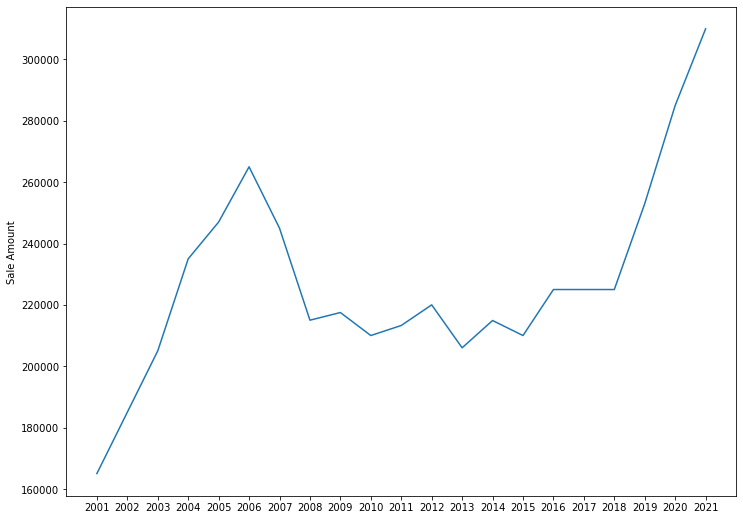

In [180]:
ax = sns.lineplot(x = range(2001, 2022), y=df.groupby(['List Year'])['Sale Amount'].median(), data=df)
ax.set_xticks(range(2001, 2022))
# ax.set_yticks(range(160000, 320000, 10000))
plt.show()

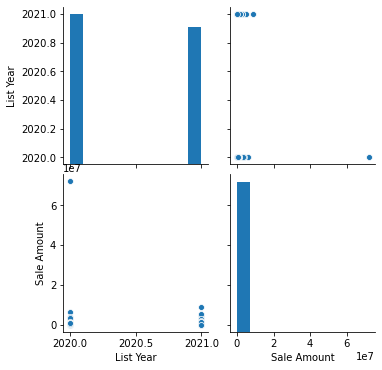

In [162]:
sample_df = df.sample(10000)
sns.pairplot(sample_df[(sample_df['Property Type'] == 'Residential')][['List Year', 'Sale Amount']])

In [164]:
#sns.heatmap(sample_df[['List Year', 'Sale Amount']])
sample_df[['List Year', 'Sale Amount']].describe()

,List Year,Sale Amount
count,10000.000000,1.000000e+04
mean,2010.761200,3.904662e+05
std,6.538673,1.163082e+06
min,2001.000000,0.000000e+00
25%,2004.000000,1.400000e+05
50%,2011.000000,2.300000e+05
75%,2017.000000,3.710000e+05
max,2021.000000,7.200000e+07


In [165]:
pd.qcut(sample_df["Sale Amount"], q=[0, 0.4, 0.8, 1],
                         labels=["lowest", "middle", "top"])


68006     middle
537986    middle
103840       top
978113       top
75008     lowest
           ...  
123481    lowest
373300    middle
325969       top
698982    lowest
98614        top
Name: Sale Amount, Length: 10000, dtype: category
Categories (3, object): ['lowest' < 'middle' < 'top']

In [206]:
def standardize_dates(df: pd.DataFrame, date_col: str) -> pd.DataFrame:
    '''
    Function that receives a pd.DataFrame obj and returns a Data Frame w/ standard 
    Date, Year and Month cols for the period of interest (2001 - 2021)
    '''
    df[date_col] = pd.to_datetime(df[date_col])
    df['Month'] = df[date_col].dt.month
    df['Year'] = df[date_col].dt.year
    df = df[(df['Year'] > 2000) & (df['Year'] < 2022)]
    return df

In [202]:
cpi_df = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CPIAUCSL&scale=left&cosd=1947-01-01&coed=2024-02-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-04-05&revision_date=2024-04-05&nd=1947-01-01')

In [203]:
cpi_df = standardize_dates(cpi_df, 'DATE')

DATE         object
CPIAUCSL    float64
dtype: object


In [204]:
cpi_df.head()

,DATE,CPIAUCSL,Month,Year
648,2001-01-01,175.6,1,2001
649,2001-02-01,176.0,2,2001
650,2001-03-01,176.1,3,2001
651,2001-04-01,176.4,4,2001
652,2001-05-01,177.3,5,2001


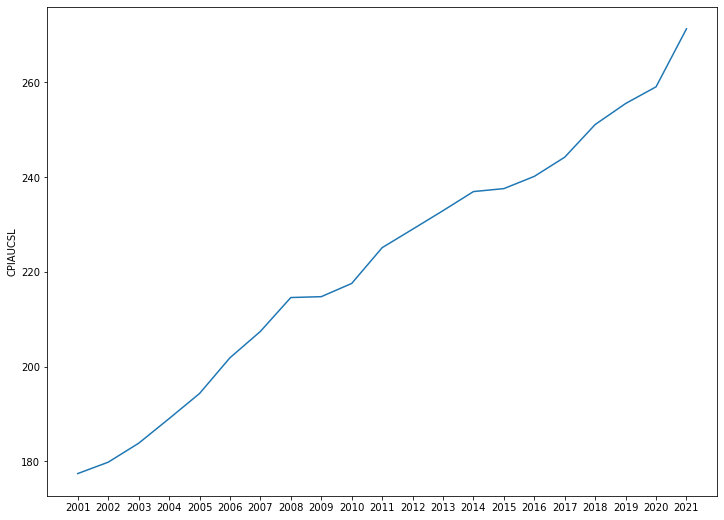

In [205]:
plot = sns.lineplot(x = range(2001, 2022), y=cpi_df.groupby(['Year'])['CPIAUCSL'].median(), data=cpi_df)

# for ind, label in enumerate(plot.get_xticklabels()):
#     if ind % 1 == 0:  # every 10th label is kept
#         label.set_visible(True)
#     else:
#         label.set_visible(False)
plot.set_xticks(range(2001, 2022))     
plt.show()

In [194]:
unemployment_df = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1139&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=UNRATE&scale=left&cosd=1948-01-01&coed=2024-03-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-04-05&revision_date=2024-04-05&nd=1948-01-01')

In [183]:
unemployment_df.tail()

,DATE,UNRATE
910,2023-11-01,3.7
911,2023-12-01,3.7
912,2024-01-01,3.7
913,2024-02-01,3.9
914,2024-03-01,3.8


In [192]:
def standardize_dates(df: pd.DataFrame, date_col: str) -> pd.DataFrame:
    '''
    Function that receives a pd.DataFrame obj and returns a Data Frame w/ standard Date, Year and Month cols
    For the period of interest (2001 - 2021)
    '''
    print(df.dtypes)
    df[date_col] = pd.to_datetime(df[date_col])
    df['Month'] = df[date_col].dt.month
    df['Year'] = df[date_col].dt.year
    df = df[(df['Year'] > 2000) & (df['Year'] < 2022)]
    return df

In [196]:
unemployment_df = standardize_dates(unemployment_df, 'DATE')

DATE      datetime64[ns]
UNRATE           float64
Month              int32
Year               int32
dtype: object


In [197]:
unemployment_df.head()

,DATE,UNRATE,Month,Year
636,2001-01-01,4.2,1,2001
637,2001-02-01,4.2,2,2001
638,2001-03-01,4.3,3,2001
639,2001-04-01,4.4,4,2001
640,2001-05-01,4.3,5,2001


In [ ]:
plot = sns.lineplot(x = range(2001, 2022), y=cpi_df.groupby(['Year'])['UNRATE'].median(), data=cpi_df)

# for ind, label in enumerate(plot.get_xticklabels()):
#     if ind % 1 == 0:  # every 10th label is kept
#         label.set_visible(True)
#     else:
#         label.set_visible(False)
plot.set_xticks(range(2001, 2022))     
plt.show()